# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     984.6
Date:                Sun, 14 Jul 2024   Prob (F-statistic):           1.02e-41
Time:                        15:40:03   Log-Likelihood:                 1.2153
No. Observations:                  50   AIC:                             5.569
Df Residuals:                      46   BIC:                             13.22
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9159      0.084     58.578      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.43033689  4.90925574  5.34930886  5.72342413  6.01429962  6.21724625
  6.34095816  6.40608436  6.44183606  6.48118744  6.55545803  6.68916703
  6.89600483  7.17658379  7.51833757  7.89758576  8.28342452  8.64280398
  8.94595823  9.17129581  9.30894708  9.36238582  9.34785845  9.29171483
  9.22607903  9.18357145  9.19194937  9.2695465   9.42226083  9.64258558
  9.91084256 10.19841523 10.47245032 10.70125555 10.85950652 10.93240753
 10.91812238 10.82807612 10.6850779  10.51957354 10.3646433  10.25056697
 10.1998489  10.22352068 10.31932861 10.47210403 10.65625546 10.83997322
 10.99045565 11.07929836]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[11.07677878 10.94331347 10.69838287 10.3863804  10.06574344  9.79464581
  9.61675475  9.55053974  9.58475045  9.68117124]


## Plot comparison

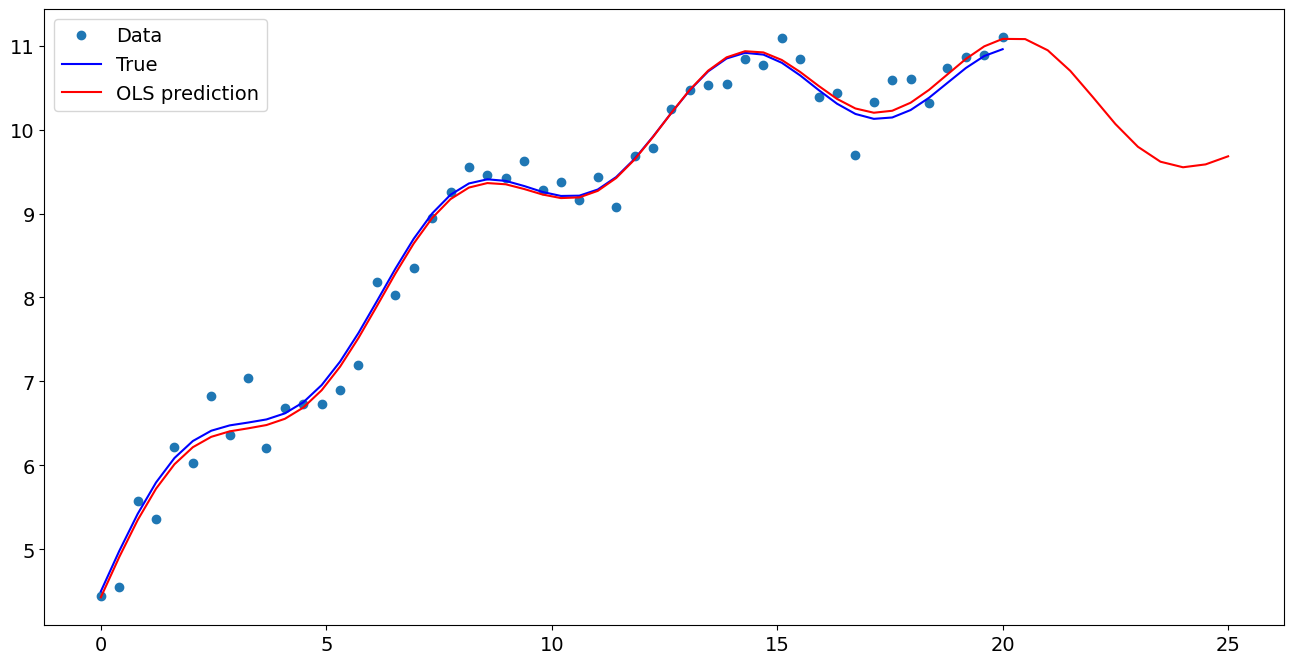

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.915886
x1                  0.503993
np.sin(x1)          0.496744
I((x1 - 5) ** 2)   -0.019422
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    11.076779
1    10.943313
2    10.698383
3    10.386380
4    10.065743
5     9.794646
6     9.616755
7     9.550540
8     9.584750
9     9.681171
dtype: float64